

# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TO DO: Insert your surname, name and ID number

Student surname: Owen

Student name: Chelsea
    
ID: 2003063

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 543690
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 60 65 63 57 60 58 62 62 58]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


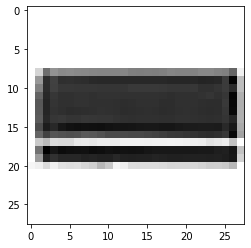

LABEL: 8
INPUT:


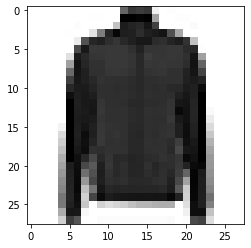

LABEL: 4
INPUT:


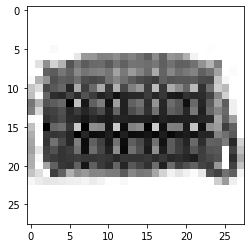

LABEL: 8
INPUT:


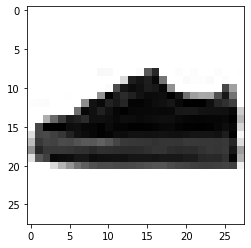

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,47)
plot_input(X_test,y_test,52)
plot_input(X_test,y_test,502)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
C = [0.001, 0.01, 0.1, 1, 10, 100]
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

svclassifier = SVC(kernel = 'linear')

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")

gridsearch = GridSearchCV(SVC(kernel = 'linear'), parameters, refit = True, cv = 4)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)
clf = gridsearch.best_params_
print(clf)

print("Score with best parameters:")

print(gridsearch.best_score_)
#print(gridsearch.get_params(bool))

print("All scores on the grid:")
results = gridsearch.cv_results_
for i in range(len(C)):
    print(results['params'][i], results['mean_test_score'][i])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.785
All scores on the grid:
{'C': 0.001} 0.5883333333333334
{'C': 0.01} 0.755
{'C': 0.1} 0.785
{'C': 1} 0.7833333333333334
{'C': 10} 0.7833333333333334
{'C': 100} 0.7833333333333334


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

gridsearch = GridSearchCV(SVC(kernel = 'poly', degree = 2), parameters, refit = True, cv = 4)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(gridsearch.best_params_)

print("Score with best parameters:")
print(gridsearch.best_score_)
results = gridsearch.cv_results_
#print(results)    


print("\nAll scores on the grid:")
for i in range(9):
    print(results['params'][i], results['mean_test_score'][i])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.765

All scores on the grid:
{'C': 0.05, 'gamma': 0.05} 0.7266666666666667
{'C': 0.05, 'gamma': 0.5} 0.7616666666666667
{'C': 0.05, 'gamma': 5.0} 0.7616666666666667
{'C': 0.5, 'gamma': 0.05} 0.765
{'C': 0.5, 'gamma': 0.5} 0.7616666666666667
{'C': 0.5, 'gamma': 5.0} 0.7616666666666667
{'C': 5, 'gamma': 0.05} 0.7616666666666667
{'C': 5, 'gamma': 0.5} 0.7616666666666667
{'C': 5, 'gamma': 5.0} 0.7616666666666667


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

gridsearch = GridSearchCV(SVC(kernel = 'poly', degree = 4), parameters, refit = True, cv = 4)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)

print ('RESULTS FOR POLY DEGREE=4 KERNEL')

print("Best parameters set found:")
print(gridsearch.best_params_)

print("Score with best parameters:")
print(gridsearch.best_score_)
results = gridsearch.cv_results_
#print(results)    


print("\nAll scores on the grid:")
for i in range(9):
    print(results['params'][i], results['mean_test_score'][i])

RESULTS FOR POLY DEGREE=4 KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.72

All scores on the grid:
{'C': 0.05, 'gamma': 0.05} 0.6983333333333334
{'C': 0.05, 'gamma': 0.5} 0.7133333333333334
{'C': 0.05, 'gamma': 5.0} 0.7133333333333334
{'C': 0.5, 'gamma': 0.05} 0.72
{'C': 0.5, 'gamma': 0.5} 0.7133333333333334
{'C': 0.5, 'gamma': 5.0} 0.7133333333333334
{'C': 5, 'gamma': 0.05} 0.7133333333333334
{'C': 5, 'gamma': 0.5} 0.7133333333333334
{'C': 5, 'gamma': 5.0} 0.7133333333333334


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [13]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel


gridsearch = GridSearchCV(SVC(kernel = 'rbf', degree = 4), parameters, refit = True, cv = 4)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)


print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(gridsearch.best_params_)

print("Score with best parameters:")
print(gridsearch.best_score_)
results = gridsearch.cv_results_
#print(results)    


print("\nAll scores on the grid:")
for i in range(16):
    print(results['params'][i], results['mean_test_score'][i])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 50, 'gamma': 0.005}
Score with best parameters:
0.7866666666666666

All scores on the grid:
{'C': 0.5, 'gamma': 0.005} 0.7283333333333333
{'C': 0.5, 'gamma': 0.05} 0.6933333333333332
{'C': 0.5, 'gamma': 0.5} 0.10833333333333334
{'C': 0.5, 'gamma': 5} 0.13166666666666665
{'C': 5, 'gamma': 0.005} 0.78
{'C': 5, 'gamma': 0.05} 0.7533333333333334
{'C': 5, 'gamma': 0.5} 0.12333333333333332
{'C': 5, 'gamma': 5} 0.10833333333333334
{'C': 50, 'gamma': 0.005} 0.7866666666666666
{'C': 50, 'gamma': 0.05} 0.7533333333333334
{'C': 50, 'gamma': 0.5} 0.12333333333333332
{'C': 50, 'gamma': 5} 0.10833333333333334
{'C': 500, 'gamma': 0.005} 0.7866666666666666
{'C': 500, 'gamma': 0.05} 0.7533333333333334
{'C': 500, 'gamma': 0.5} 0.12333333333333332
{'C': 500, 'gamma': 5} 0.10833333333333334


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The linear and RBF kernels give better scores than either of the polynomial kernels. RBF does marginally better than linear but they give comparable results. Overall, RBF is the best model but using a linear model would also work well. 

## TO DO 5
Report here the best SVM kernel and parameters

In [16]:
from sklearn.svm import SVC
#get training and test error for the best SVM model from CV
best_SVM = SVC(C = 50, kernel = 'rbf', gamma=0.005)
best_SVM.fit(X_train, y_train)
training_score = best_SVM.score(X_train, y_train)

best_SVM.predict(X_test)
test_score = best_SVM.score(X_test, y_test)

 #(error is 1 - svm.score)
test_error = 1-test_score
training_error = 1-training_score
print ("Best SVM training error: %f" %training_error)
print ("Best SVM test error: %f" %test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.209750



## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [17]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],SVC(model.__dict__['C'], kernel = 'rbf', gamma=0.5).fit(X_train, y_train).score(X_train, y_train)))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],SVC(model.__dict__['C'], kernel = 'rbf', gamma=0.5).fit(X_train,y_train).score(X_test, y_test)))
    
    plt.show()

C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


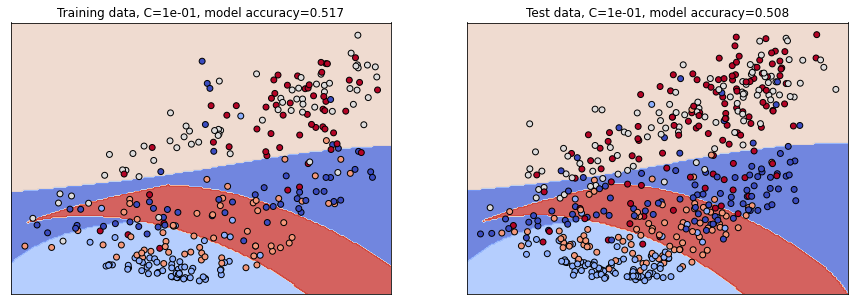

C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


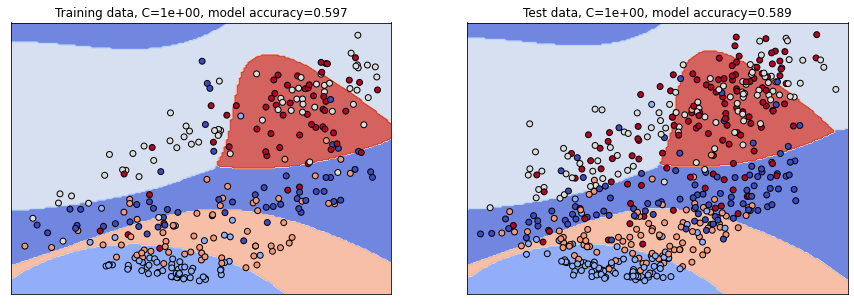

C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=1000.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=1000.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=1000.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


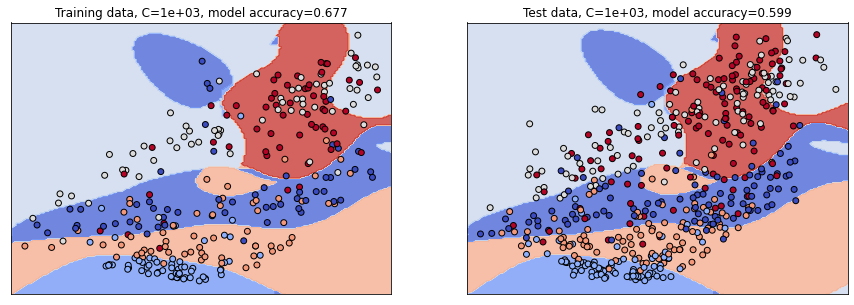

C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=100000.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=100000.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=100000.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


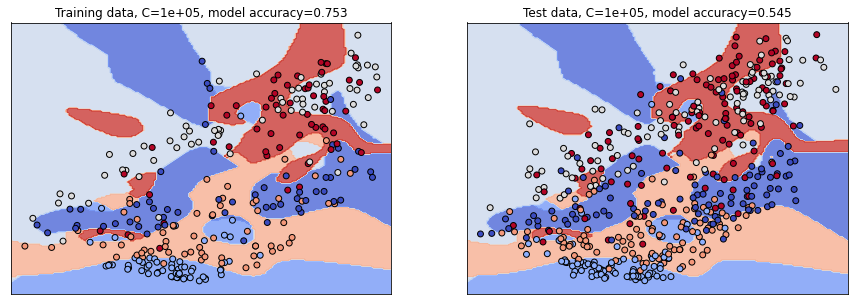

In [18]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(C, kernel = 'rbf', gamma=0.5).fit(X_train_pca, y_train_plot)    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

For higher values of C, the boundaries become more and more complex. There are also more areas of classification being used, for the lowest C there are only four different areas however for the highest value of C there are many more smaller areas.
The model accuracy keeps improving as the C value increases, however on the test set the model accuracy peaks at C = 1e+3 and decreases for the final model with C = 1e+5.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [19]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


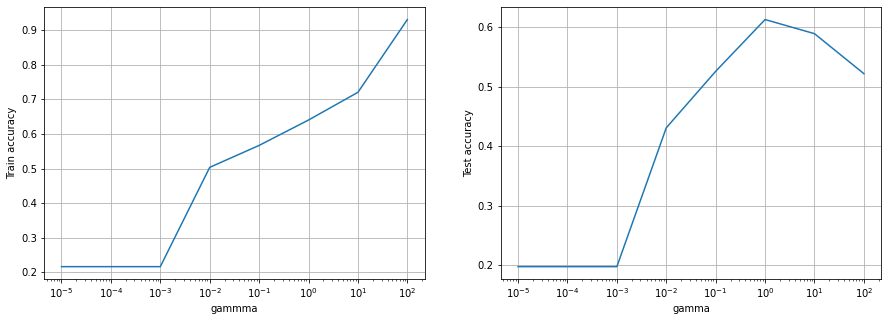

In [20]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []


for g in gamma_values:
    my_svm = SVC(C = 1, kernel = 'rbf', gamma = g).fit(X_train_pca, y_train_plot)    
    train_acc_list.append(my_svm.score(X_train_pca, y_train_plot))
    test_acc_list.append(my_svm.score(X_test_pca, y_test_plot))

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Training error continues decreasing with increasing gamma, meaning the model accuracy continues improving however this does not correspond to increasing accuracy on the test set. On the test set the accuracy increases until it reaches it's maximum value at gamma = 10, then accuracy decreases again. The best value of gamma is therefore gamma = 10. The decreases in accuracy after this value corresponds to overfitting of the training data. When the training data is being too precisely followed, the model is tuning itself to those particular values in the training set and then when it works on unseen values in the test set it has a higher error as it has been too precisely calibrated to the data samples of the training set.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [21]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [144 160 135 164 125 149 168 170 147 138]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [31]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C = 50, kernel = 'rbf', gamma=0.005)
a = best_SVM.fit(X_train, y_train)
test_score = best_SVM.score(X_test, y_test)
training_score = best_SVM.score(X_train, y_train)
 #(error is 1 - svm.score)
trainingset_error = 1-training_score
testset_error = 1-test_score
print ("Best SVM training error: %f" %trainingset_error)
print ("Best SVM test error: %f" %testset_error)

Best SVM training error: 0.000000
Best SVM test error: 0.170803


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [32]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
a = logreg.predict(X_train)
train_err = 0
for i in range(len(a)):
    if a[i] != y_train[i]:
        train_err += 1
print(a == y_train)
print(train_err)
training_error = train_err/len(y_train)
b = logreg.predict(X_test)
test_err = 0
for i in range(len(b)):
    if b[i] != y_test[i]:
        test_err += 1
print(b == y_test)
print(test_err)
test_error = test_err/len(y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

[ True  True  True ...  True  True  True]
0
[ True  True  True ...  True  True  True]
12691
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.216940


C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 10 Try  with regularization (use C=1)¶

In [33]:
logreg = linear_model.LogisticRegression(C=1)
#lower test error/test error closer to training error
logreg.fit(X_train, y_train)
a = logreg.predict(X_train)
train_err = 0
for i in range(len(a)):
    if a[i] != y_train[i]:
        train_err += 1
error_rate_training = train_err/len(y_train)
#print(error_rate_training)
training_error = np.sum(a != y_train)/len(y_train)
b = logreg.predict(X_test)
test_err = 0
for i in range(len(b)):
    if b[i] != y_test[i]:
        test_err += 1
test_error = test_err/len(y_test)
print ("Best regularized logistic regression training error:" + str(training_error))
print ("Best regularized logistic regression test error:" + str(test_error))

Best regularized logistic regression training error:0.012666666666666666
Best regularized logistic regression test error:0.19155555555555556


C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

SVM m=600 results

Best SVM training error: 0.013333
Best SVM test error: 0.171419

SVM m=1500 results

Best SVM training error: 0.000667
Best SVM test error: 0.171419

Training errors are similar, slightly lower with m=1500. The test errors are basically the same, sometimes slightly higher with m=600 as it has less data to train on. 

Logistic Regression without regularisation

Best logistic regression training error: 0.001333
Best logistic regression test error: 0.227111

Logistic Regression with regularisation 

Best regularized logistic regression training error:0.0133334
Best regularized logistic regression test error:0.1926837

Compared to each other, test error is lower with regularisation even though it has factor 10 larger training error. Compared to SVM, both LR errors are larger and therefore can conclude it is preferable to use SVM with a large training set. 

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [34]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

5875
SVM label prediction 0
LR label prediction 8
INPUT:


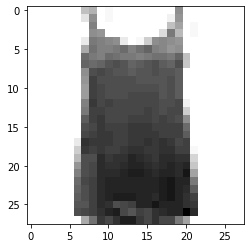

LABEL: 0


In [39]:
SVM_list = SVM_prediction.tolist()
y_test_list = y_test.tolist()
LR_list = LR_prediction.tolist()
count = 0
missclassified_index = []
for i in y_test_list:
    if y_test_list[i] != LR_list[i]:
        if y_test_list[i] == SVM_list[i]:
            missclassified_index.append(i)
            count += 1
print(count)
a = missclassified_index[1]
print("SVM label prediction", SVM_prediction[a])
print("LR label prediction", LR_prediction[a])
plot_input(X_test, y_test, missclassified_index[a])


## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [40]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, SVM_prediction, normalize=None)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, LR_prediction,normalize=None)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5856 5840 5865 5836 5875 5851 5832 5830 5853 5862]

 Confusion matrix SVM  
 
 [[4550   41  134  319   24    5  719    0   62    2]
 [  51 5544   69  146    8    1   17    0    3    1]
 [  81    7 4344   68  735    2  596    0   32    0]
 [ 298   93   52 4978  167    1  232    0   15    0]
 [  22   18  648  268 4247    1  654    0   16    1]
 [   6    0    1    1    0 5246    2  392   28  175]
 [ 924   20  647  234  504    1 3403    0   98    1]
 [   0    0    0    0    0  255    0 5240   14  321]
 [  42   10   72   42   35   34   89   20 5501    8]
 [   1    1    1    1    0  112    0  289    2 5455]]

 Confusion matrix SVM (normalized)   
 
 [[0.78 0.01 0.02 0.05 0.   0.   0.12 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.74 0.01 0.13 0.   0.1  0.   0.01 0.  ]
 [0.05 0.02 0.01 0.85 0.03 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.11 0.05 0.72 0.   0.11 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.9  0.   0.07 0. 

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why do some classes have lower accuracies and others a higher one ? Make some guesses on the possible causes.

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

Lower accuracies are on feautures that are more difficult to differentiate between, eg a long sleeved top, a pullover and a shirt all look quite similar whereas bags don't look like any of the other categories so that has a very high accuracy. The cells not on the diagonal which have high values tell you where errors are most likely to be made, and the cells that correspond to t-shirt/shirt, shirt/pullover have the highest values in my confusion matrices. This makes sense as visually we know those items are similar. 